In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.timeseries import BoxLeastSquares
import scipy.signal
from scipy.signal import find_peaks
from scipy.signal import savgol_filter
from lightkurve import search_lightcurve
import courseworkb
import importlib

# Reload the courseworkb module to ensure the latest version is used
importlib.reload(courseworkb)


<module 'courseworkb' from '/home/omcevoy/AstroCourseworkB/courseworkb.py'>

In [12]:
target =  'Kepler-12'
kepler_dataframe, stellar_data = courseworkb.fetch_kepler_data_and_stellar_info(target)


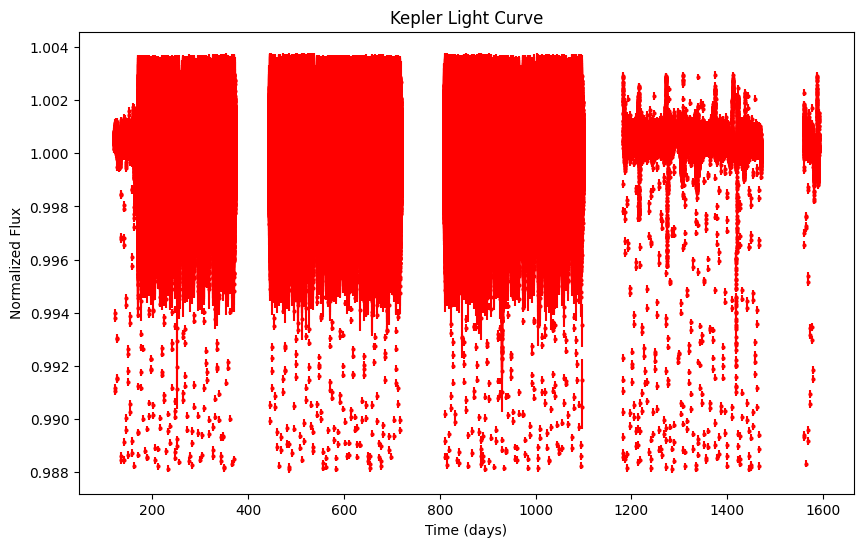

In [13]:
courseworkb.plot_light_curve(kepler_dataframe['time'], kepler_dataframe['flux'], kepler_dataframe['error'])

Running Lomb-Scargle Periodogram Analysis...


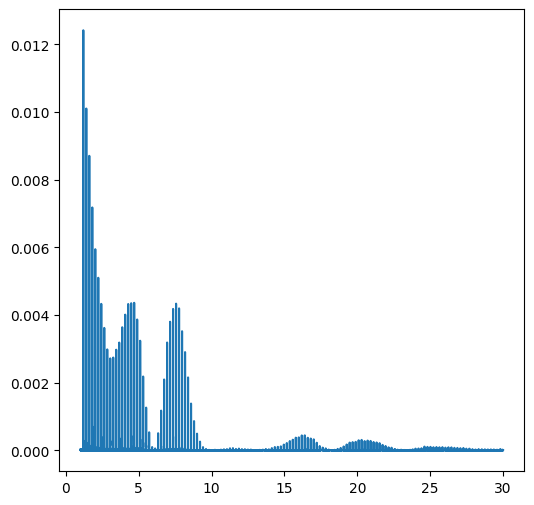

computing second periodogram
Gradient Threshold: 4.51e-07, Second Derivative Threshold: 1.82e-03


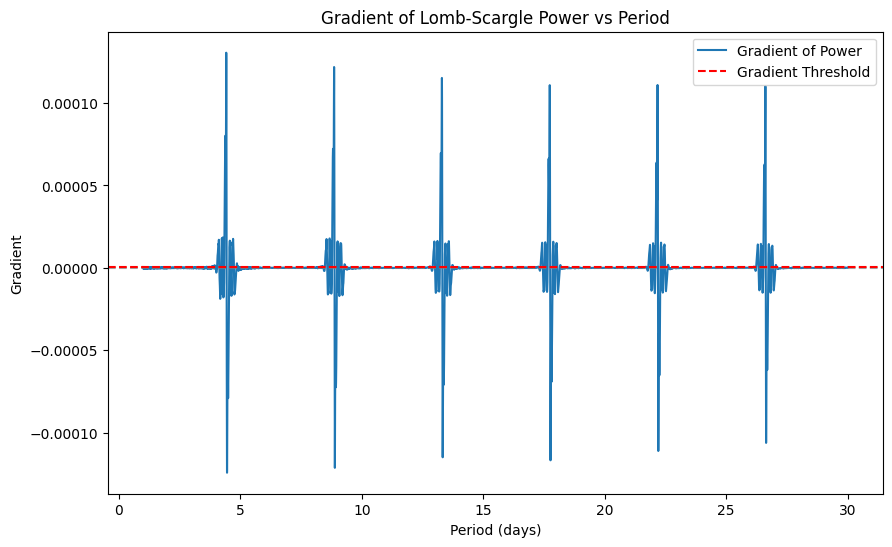

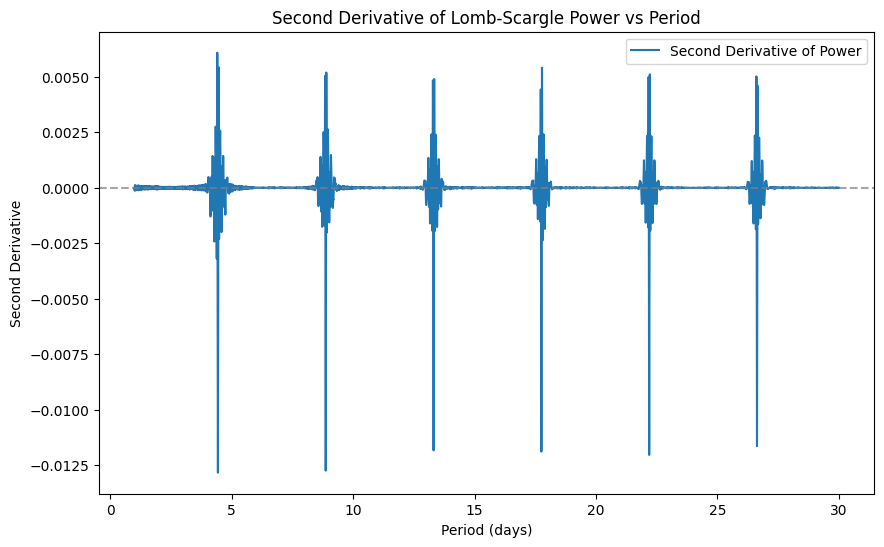

Excluding peaks before period = 1.00 days
Lomb-Scargle Periodogram analysis done


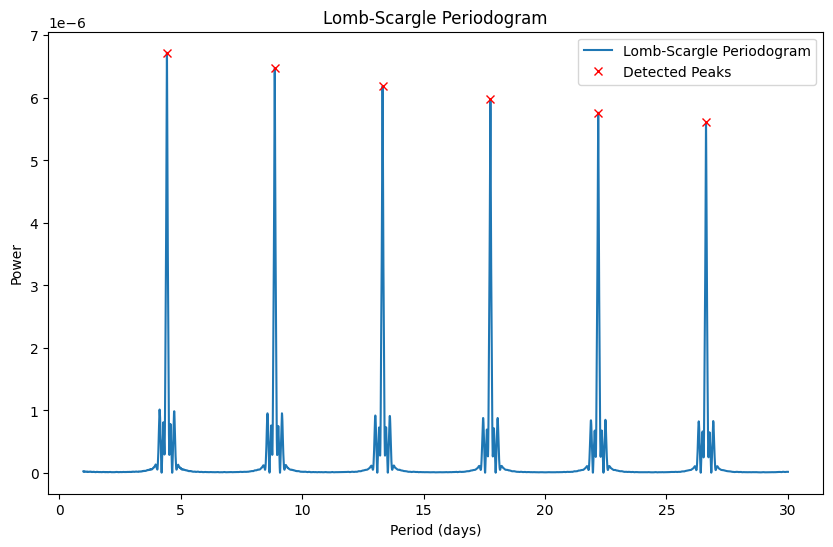

In [14]:

peaks_of_lightcurve = courseworkb.run_lomb_scargle_analysis(kepler_dataframe,resolution=200000)

In [15]:
print(len(peaks_of_lightcurve))
peaks_of_lightcurve_filt = courseworkb.remove_exact_duplicates(peaks_of_lightcurve,0.05, False)
print(len(peaks_of_lightcurve_filt))


results_list_no_filter = courseworkb.analyze_peaks_with_bls(
      kepler_dataframe["time"].values,
      kepler_dataframe["flux"].values,
      kepler_dataframe["error"].values,
      peaks_of_lightcurve_filt,
      200000
)





6
Adding period 4.438 days to the unique results.
Adding period 8.876 days to the unique results.
Adding period 13.314 days to the unique results.
Adding period 17.752 days to the unique results.
Adding period 22.190 days to the unique results.
Adding period 26.627 days to the unique results.
6
Analyzing period 4.44 days...
Analyzing period 8.88 days...
Analyzing period 13.31 days...
Analyzing period 17.75 days...
Analyzing period 22.19 days...
Analyzing period 26.63 days...
Best Period: 4.437970080938227, Best Duration: 0.185, Best Transit Time: 122.19060905774683
Best Period: 8.875912635518297, Best Duration: 0.185, Best Transit Time: 122.19260905774682
Best Period: 13.313908427129288, Best Duration: 0.185, Best Transit Time: 122.19060905774683
Best Period: 17.75183618012932, Best Duration: 0.185, Best Transit Time: 135.50660905774683
Best Period: 22.189837807366196, Best Duration: 0.187, Best Transit Time: 139.94260905774684
Best Period: 26.627800928590435, Best Duration: 0.185, Bes

In [16]:


print(f"Number of peaks found: {len(results_list_no_filter)}")

results_list = courseworkb.remove_duplicate_periods(results_list_no_filter,0.1,0.5, 0.75)

print(f"Number of peaks found after removing duplicates: {len(results_list)}")

print(f"headers: {results_list[0].keys()}")

Number of peaks found: 6
Adding period 4.438 days to the unique results.
Adding period 8.876 days to the unique results.
Adding period 13.314 days to the unique results.
Adding period 17.752 days to the unique results.
Adding period 22.190 days to the unique results.
Adding period 26.628 days to the unique results.
Adding period 4.438 days to the final results.
Adding period 22.190 days to the final results.
Number of peaks found after removing duplicates: 2
headers: dict_keys(['candidate_period', 'refined_period', 'transit_model', 'power', 'duration', 'depth'])


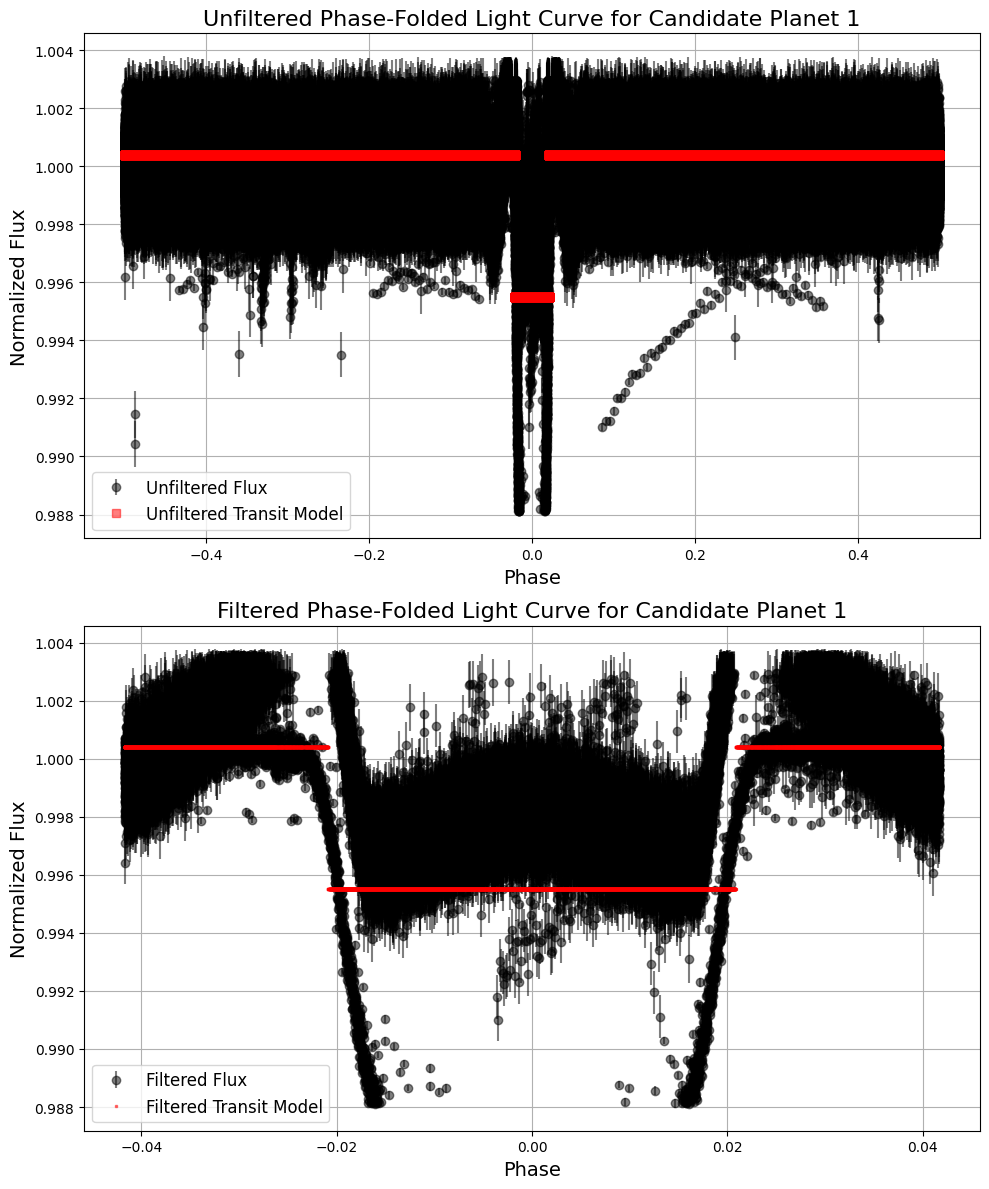

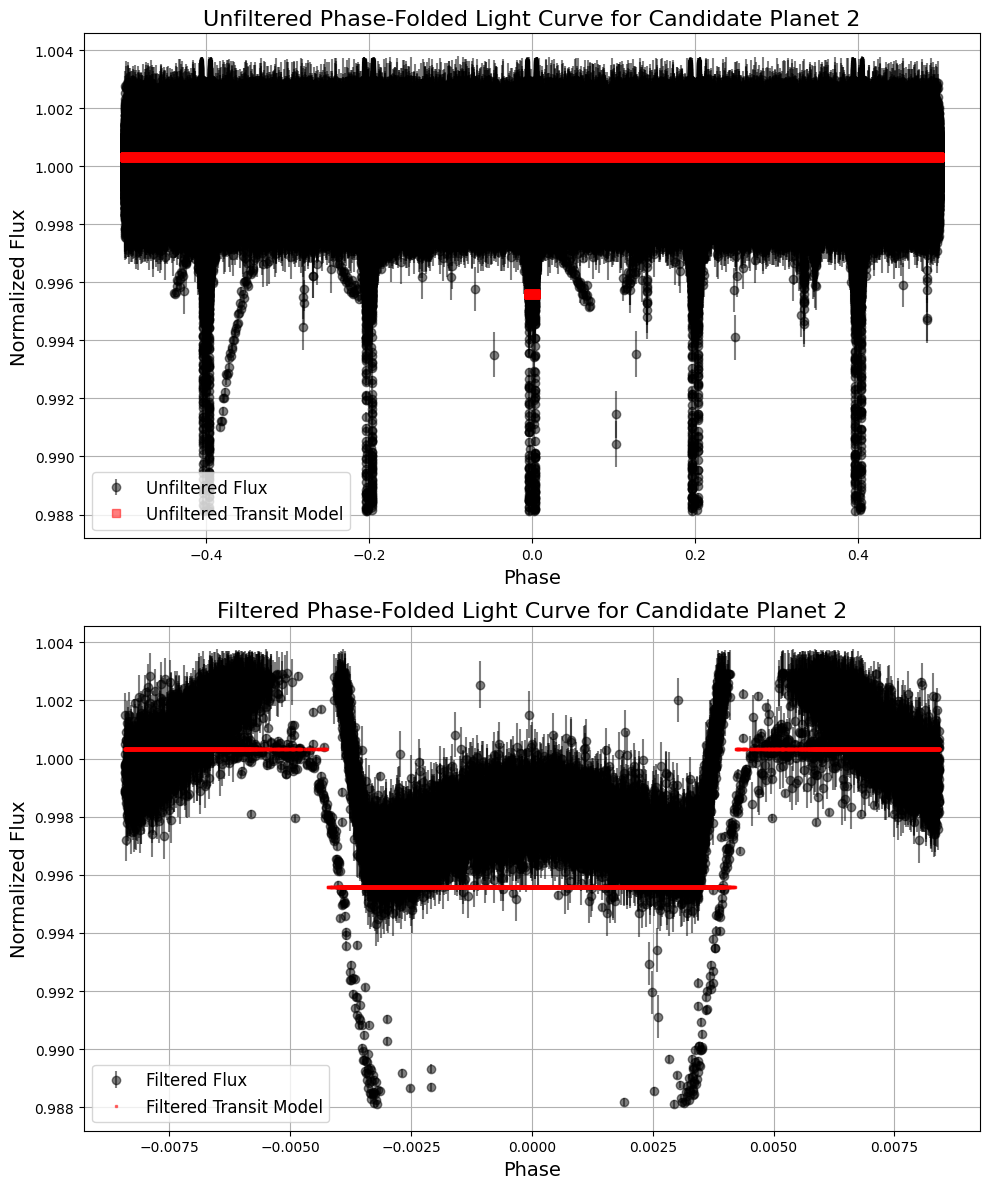

In [17]:
# Reload the courseworkb module to ensure the latest version is used
importlib.reload(courseworkb)
courseworkb.plot_phase_folded_light_curves(kepler_dataframe,results_list )

In [18]:
courseworkb.summarize_results(results_list,stellar_data)



Detected Planet Candidates:
----------------------------------------
Stellar Radius: 1.415 Solar Radii
Stellar Temperature: 5953 K
----------------------------------------

----------------------------------------
Candidate 1:
  Initial Period = 4.44 days
  Refined Period = 4.44 days
  Transit Depth  = 4.89e-03
  Transit Duration = 0.18 days
  Power = 1507386.41
----------------------------------------
Best Transit Candidate: Period = 4.44 days, Depth = 4.89e-03
Estimated Planet Radius: 0.099 Solar Radii
Estimated Planet Radius: 10.794 Earth Radii
Estimated Planet Radius: 0.985 Jupiter Radii

----------------------------------------
Candidate 2:
  Initial Period = 22.19 days
  Refined Period = 22.19 days
  Transit Depth  = 4.72e-03
  Transit Duration = 0.19 days
  Power = 298435.23
----------------------------------------
Best Transit Candidate: Period = 22.19 days, Depth = 4.72e-03
Estimated Planet Radius: 0.097 Solar Radii
Estimated Planet Radius: 10.608 Earth Radii
Estimated Planet